In [2]:
import numpy as np
import pandas as pd

In [152]:
data = pd.read_feather("word-embeddings.feather")
print(data.head())

embeds = []
for i in range(len(data)):
    embeds.append(data['vit'][i])
embeds = np.asarray(embeds)

k = 3
feature_mins = np.min(embeds, axis=0)  
feature_maxs = np.max(embeds, axis=0)  

centroids = np.random.rand(k, embeds.shape[1]) 
centroids = feature_mins + (feature_maxs - feature_mins) * centroids

embeds_fit = embeds[0:180,:]
print(embeds_fit.shape)
clusters = []
# distances = np.sqrt(np.sum((embeds_fit[:,])))
# for i in range(embeds_fit.shape[0]):
#     mind = float('inf')
#     index = -1
#     for j in range(3):
#         distance = np.sqrt(np.sum((centroids[j] - embeds_fit[i])**2))
#         print(distance)
#         if(distance<mind):
#             mind = distance
#             index = j
#     clusters.append(index)

distances = np.sqrt(np.sum((embeds_fit[:, np.newaxis, :] - centroids[np.newaxis, :, :]) ** 2, axis=2))
clusters = np.argmin(distances, axis=1)
print(centroids.shape)

# print(distances.shape)
# print(clusters)
# indices = []
# print(centroids)
# for i in range(k):
#     indices = (np.argwhere(clusters==i))
#     if(len(indices)>0):
#         centroids[i] = np.mean(embeds_fit[indices,:],axis=0)
# orig_clusters = clusters
# flag = 1
# iterations = 1
# while iterations<100:
#     iterations+=1
#     flag = 0
#     distances = np.sqrt(np.sum((embeds_fit[:, np.newaxis, :] - centroids[np.newaxis, :, :]) ** 2, axis=2))
#     clusters = np.argmin(distances, axis=1)
#     if np.array_equal(orig_clusters,clusters):
#         break
#     for i in range(k):
#         indices = (np.argwhere(clusters==i))
#         if(len(indices)>0):
#             centroids[i] = np.mean(embeds_fit[indices,:],axis=0)
#     orig_clusters = clusters


# print("Number of iterations "+ str(iterations))




   words                                                vit
0  drive  [-0.012995675206184387, -0.10337956249713898, ...
1   sing  [0.09755142033100128, -0.09364829212427139, -0...
2   deer  [0.17334489524364471, -0.2442416399717331, 0.1...
3  panda  [0.040555089712142944, -0.10053896903991699, 0...
4    ape  [-0.03181127458810806, -0.006482355296611786, ...
(180, 512)
(3, 512)


In [74]:
embeds_fit = np.asarray([[1,2,3],[4,5,6],[7,8,9]])
centroids = np.asarray([[1,2,3],[4,5,6]])
distances = np.sqrt(np.sum((embeds_fit[:, np.newaxis, :] - centroids[np.newaxis, :, :]) ** 2, axis=2))
print(distances)

[[ 0.          5.19615242]
 [ 5.19615242  0.        ]
 [10.39230485  5.19615242]]


In [267]:
class KMeansClustering:
    def __init__(self, k):
        self.k = k

    def fit(self, train_data):
        mins = np.min(train_data, axis=0)
        maxs = np.max(train_data, axis=0)
        np.random.seed(13)
        self.centroids = np.random.rand(self.k, train_data.shape[1])
        self.centroids = mins + (maxs - mins) * self.centroids
        
        distances = np.sqrt(np.sum((train_data[:, np.newaxis, :] - self.centroids[np.newaxis, :, :]) ** 2, axis=2))
        clusters = np.argmin(distances, axis=1)

        iterations = 0
        while iterations < 500:
            iterations += 1
            for i in range(self.k):
                indices = np.where(clusters == i)[0]
                if len(indices) > 0:
                    self.centroids[i] = np.mean(train_data[indices, :], axis=0)
            if np.all(clusters == np.argmin(np.sqrt(np.sum((train_data[:, np.newaxis, :] - self.centroids[np.newaxis, :, :]) ** 2, axis=2)), axis=1)):
                break

        print("Number of iterations: " + str(iterations))

    def predict(self, test_data):
        distances = np.sqrt(np.sum((test_data[:, np.newaxis, :] - self.centroids[np.newaxis, :, :]) ** 2, axis=2))
        min_distances = np.min(distances,axis=1)
        WCSE = np.sum(min_distances**2)
        
        return WCSE


In [253]:
data = pd.read_feather("word-embeddings.feather")
print(data.head())

embeds = []
for i in range(len(data)):
    embeds.append(data['vit'][i])
embeds = np.asarray(embeds)

train_data =embeds[0:180,:]
test_data = embeds[180:200,:]
# print(test_data[0])
# kmc = KMeansClustering(3)
# kmc.fit(train_data)
# wcse = kmc.predict(test_data)
# wcse

   words                                                vit
0  drive  [-0.012995675206184387, -0.10337956249713898, ...
1   sing  [0.09755142033100128, -0.09364829212427139, -0...
2   deer  [0.17334489524364471, -0.2442416399717331, 0.1...
3  panda  [0.040555089712142944, -0.10053896903991699, 0...
4    ape  [-0.03181127458810806, -0.006482355296611786, ...


In [268]:
errors = []
for k in range(1,11):
    kmc = KMeansClustering(k)
    kmc.fit(embeds)
    wcse = kmc.predict(embeds)
    errors.append(wcse)


Number of iterations: 1
Number of iterations: 1
Number of iterations: 500
Number of iterations: 500
Number of iterations: 500
Number of iterations: 500
Number of iterations: 500
Number of iterations: 500
Number of iterations: 500
Number of iterations: 500


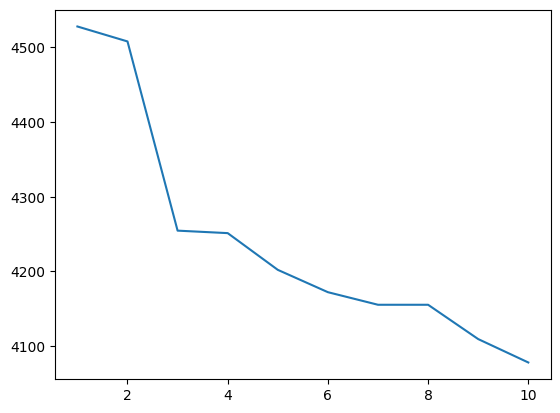

In [269]:
import matplotlib.pyplot as plt
x = np.linspace(1,10,10)
plt.plot(x,errors)

   words                                                vit
0  drive  [-0.012995675206184387, -0.10337956249713898, ...
1   sing  [0.09755142033100128, -0.09364829212427139, -0...
2   deer  [0.17334489524364471, -0.2442416399717331, 0.1...
3  panda  [0.040555089712142944, -0.10053896903991699, 0...
4    ape  [-0.03181127458810806, -0.006482355296611786, ...
Cluster assignments: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Centroids: [[-1.29900086e-02 -5.21759896e-02 -1.90298252e-02  7.76085762e-02
  -5.49704913e-02 -3.46861647e-02 -1.20059666e-01 -1.08713815e+00
  -1.75144684e-01  2.18883874e-01  1.43400622e-02 -1.11440015e-01
  -

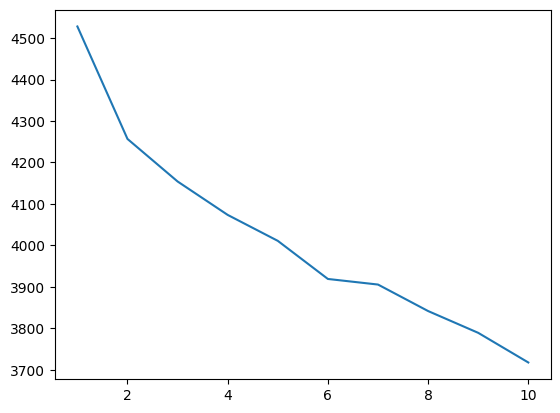

In [270]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

# Load the data
data = pd.read_feather("word-embeddings.feather")
print(data.head())

# Convert the 'vit' column to a NumPy array
embeds = np.array(data['vit'].tolist())  # Assuming 'vit' column contains lists of embeddings

# Define the number of clusters
k = 10  # You can change this value based on your requirements

# Split the data into training and test sets
train_data = embeds[0:180, :]
test_data = embeds[180:200, :]

# Initialize and fit the KMeans model
wcseads = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k)  # You can set `random_state` for reproducibility
    kmeans.fit(embeds)

    # Get cluster assignments and centroids
    clusters = kmeans.labels_
    centroids = kmeans.cluster_centers_

    # Predict clusters for the test data
    test_clusters = kmeans.predict(embeds)

    # Calculate WCSE for the test data
    distances = np.sqrt(np.sum((embeds[:, np.newaxis, :] - centroids[np.newaxis, :, :]) ** 2, axis=2))
    wcse = np.sum(np.min(distances, axis=1) ** 2)

    # Print results
    print("Cluster assignments:", clusters)
    print("Centroids:", centroids)
    print("WCSE:", wcse)
    wcseads.append(wcse)

import matplotlib.pyplot as plt
x = np.linspace(1,10,10)
plt.plot(x,wcseads)
